# PyTorch Workflow -->

##### What are we going to practice in this? 
- Preparing and Loading the Data
- Building the model
- Training the model
- Evaluating the model 
- Save and Load the model
- All of it together :)


In [666]:
try:
    import torch
    from torch import nn
    import matplotlib.pyplot as plt
    import math
    import numpy as np
    print("Imported all!")
except:
    print("Error in importing")

Imported all!


## Preparing and Loading Data -> 

##### The data can be of multiple types -> 
- Excel
- Image
- Text
- DNA 
- Videos 
- Audio
- CSV

We first represent the data in numerical patterns and then train a model to recognise those patterns.

#### Linear Regression -> 

In [667]:
#Creating known parameters
weight = 0.8
bias = 0.2

#Creating input
start,end,step=0,1,0.01

X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias

print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
tensor([[0.2000],
        [0.2080],
        [0.2160],
        [0.2240],
        [0.2320],
        [0.2400],
        [0.2480],
        [0.2560],
        [0.2640],
        [0.2720]])


#### Splitting our input to Training and Test data

Generalisation is the ability of a ML model to perform well on a data set that it has never seen before.


In [668]:
train_split=int(0.8*len(X))
print(train_split)

X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

#Here another better way to split is Scikitlearn's split which induces randomness.

len(X_train), len(X_test) , len(y_train), len(y_test) 

80


(80, 20, 80, 20)

##### Visualisation of our data -> 

In [669]:
def plot_predictions(
    train_data=X_train, 
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
    print(2)
    #Plots training, test data and compares with predictions
    plt.figure(figsize=(6,6))
    
    #Plot training data in Blue -> 
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
    
    #Plot testing data in red -> 
    plt.scatter(test_data,test_labels,c="r",s=4,label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions,c="g",s=4,label="Prediction Data")
        
    plt.legend(prop={"size":10})

2


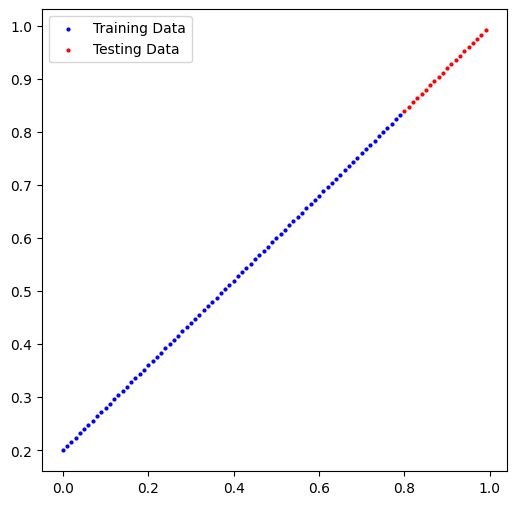

In [670]:
plot_predictions()

### Building the Model -> 
- Uses OOP concepts, Revise if needed.

#### What our model does ->
- Starts with random weights and biases
- Looks at the training data, Changes the W and B to closer to the actual values we used to create the data earlier.

#### How is our model doing this -> 
- Backpropagation
- Gradient Descent



In [671]:
#Creating the model class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights= nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        
        self.bias= nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        #requires_grad=True means it can be changed by Gradient Descent in naive language.
        
        
    #Forward Method for Computation -> 
    def forward(self,x:torch.Tensor) -> torch.Tensor: #This syntax just means this takes x input of type tt and returns a value of type tt.
        return self.weights*x + self.bias # <- Linear regression
                
        
        
        

#### PyTorch Model Building Essentials -> 
- torch.nn -> Neural Network related classes and functions
- torch.nn.Parameter -> Helps in setting up parameters.
- torch.nn.Module -> forward()
- torch.optim -> Optimizers help with gradient descent


In [672]:
torch.manual_seed(42)
model_0=LinearRegressionModel()

list(model_0.parameters())
model_0.state_dict()
#We know ideal values are 0.8,0.2

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Make predictions using `torch.inference_mode()`
We will pass x_test through our model's forward() and compare with y_test

In [673]:
with torch.inference_mode():
    y_preds=model_0(X_test)
    

y_preds,y_test
#Inference mode makes the code much faster than just doing y=model(x)

(tensor([[0.3982],
         [0.4015],
         [0.4049],
         [0.4083],
         [0.4116],
         [0.4150],
         [0.4184],
         [0.4217],
         [0.4251],
         [0.4285],
         [0.4318],
         [0.4352],
         [0.4386],
         [0.4419],
         [0.4453],
         [0.4487],
         [0.4520],
         [0.4554],
         [0.4588],
         [0.4621]]),
 tensor([[0.8400],
         [0.8480],
         [0.8560],
         [0.8640],
         [0.8720],
         [0.8800],
         [0.8880],
         [0.8960],
         [0.9040],
         [0.9120],
         [0.9200],
         [0.9280],
         [0.9360],
         [0.9440],
         [0.9520],
         [0.9600],
         [0.9680],
         [0.9760],
         [0.9840],
         [0.9920]]))

2


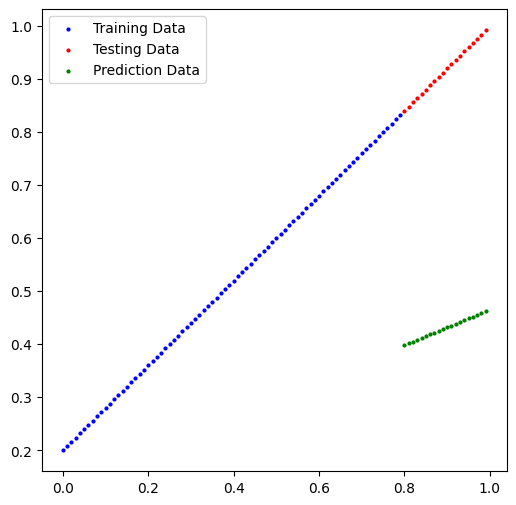

In [674]:
plot_predictions(predictions=y_preds)

## Training the Model -->
- Goal -> Moving the values of parameters from random towards actual
- Way to go -> Loss functions 
- Loss functions measures the extent of wrongness of your model's outputs
- Loss functions aka Cost functions, When minimised give the best output.
- Optimiser looks at the loss function output and adjusts the weights and biases(i.e. Parameters). It usually takes input of all parameters and a learning rate, lr is directly proportional to change/-precision
- All model training requires atleast 1 Training and 1 Testing loops.

` Note - There are multiple loss functions and optimisers and their usage is situation based. Generally loss functions for Regression Models and Classfication Models are very different. `

#### Setting up Loss Function, Optimizer and Learning Rate -> 

In [675]:
#Setting up a loss function -> 
loss_fn= nn.L1Loss()

#Setting up an Optimizer -> (Stochastic Gradient Descent )
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr-> Learning rate, VVIMP HyperParameter

#Check out learning rate scheduling.

##### Setting up a Training Loop -> 
1. Looping Through Data
2. Forward Propagation/Pass (using forward()) ---> Gives a Prediction Value
3. Calculate the loss on the Prediction value using Loss Function 
4. Optimiser 0 grad
5. Backward Propagation -> Moves backward in the network to calculate the gradient of each of the parameters of our models, with respect to the loss. 
6. Gradient Descent / Optimiser Step -> Using the optimiser we adjust model's parameters to reduce the loss.

In [676]:
#NOTE -> We are writing this for code understanding, Best approach would be wrapping it all in a function

#Foor tracking data 
test_loss_values=[]
loss_values=[]
epoch_count=[]


#Epoch -> 1 Complete Loop through the data
epochs=301

#Looping through the data

for epoch in range(epochs):
    
    model_0.train()    # <- Sets the model to training mode. TM sets all parameters that require gradients to requires_grad=True
    
    #Forward Propagation -> 
    y_pred=model_0(X_train)
    
    #Loss function -> 
    loss= loss_fn(y_pred,y_train)
    # print(f"Loss {epoch} : {loss}")
    
    #Optimizer zero grad 
    optimizer.zero_grad()   #<-Optimizer values accumulate through the loop, So we reset it every iteration.
    
    #Backpropagation -> On the loss wrt parameters
    loss.backward()
    
    #Optimizing -> Performs gradient descent
    optimizer.step()
    
        
    #Testing the model!

    model_0.eval() #<- Turns off some settings that arent needed when testing like gradient tracking.
    with torch.inference_mode(): #This is equivalent to with torch.no_grad() which is older, slower syntax

        #Forward Pass
        test_preds=model_0(X_test)
        
        #Loss -> 
        test_loss = loss_fn(test_preds,y_test)
        if(epoch%50==0):
            print(f"Epoch : {epoch}  | Loss : {loss}  |  Test Loss : {test_loss} ")
            print(model_0.state_dict(),"\n" )
        
        test_loss_values.append(test_loss)
        loss_values.append(loss)
        epoch_count.append(epoch)

        

Epoch : 0  | Loss : 0.254197895526886  |  Test Loss : 0.4723174571990967 
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])}) 

Epoch : 50  | Loss : 0.06287221610546112  |  Test Loss : 0.15212944149971008 
OrderedDict({'weights': tensor([0.4878]), 'bias': tensor([0.3273])}) 

Epoch : 100  | Loss : 0.04561980813741684  |  Test Loss : 0.1070159450173378 
OrderedDict({'weights': tensor([0.5745]), 'bias': tensor([0.2948])}) 

Epoch : 150  | Loss : 0.028491560369729996  |  Test Loss : 0.0663699358701706 
OrderedDict({'weights': tensor([0.6599]), 'bias': tensor([0.2591])}) 

Epoch : 200  | Loss : 0.011362330988049507  |  Test Loss : 0.0260679479688406 
OrderedDict({'weights': tensor([0.7451]), 'bias': tensor([0.2231])}) 

Epoch : 250  | Loss : 0.007003051694482565  |  Test Loss : 0.0032892257440835238 
OrderedDict({'weights': tensor([0.7975]), 'bias': tensor([0.2056])}) 

Epoch : 300  | Loss : 0.007003051694482565  |  Test Loss : 0.0032892257440835238 
OrderedDict({'weights'

In [677]:
model_0.state_dict()
#These are the values after running the epoch 100 times :)
#+100 cuz I ran it twice.

OrderedDict([('weights', tensor([0.7975])), ('bias', tensor([0.2056]))])

2


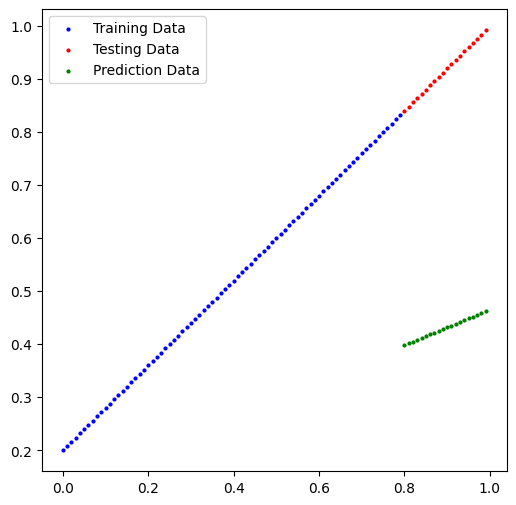

In [678]:
plot_predictions(predictions=y_preds)

2


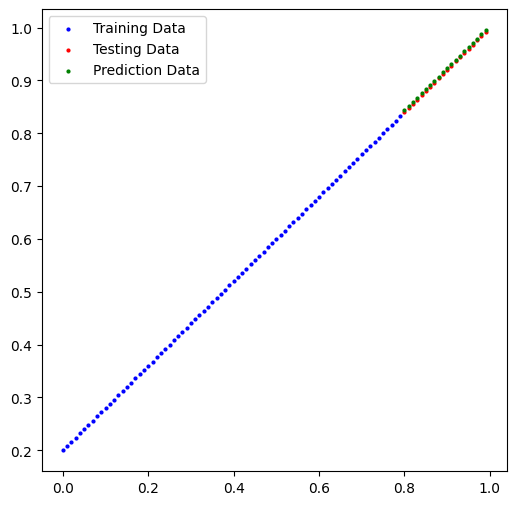

In [679]:
with torch.inference_mode():
    y_preds_new=model_0(X_test)

plot_predictions(predictions=y_preds_new)

- Random values for W and B when used to predict compared to Actual data is the first graph.
- Values after being updated by running 300 epochs and then predicting to compare is second graph.

#### Visualising Test and Training Losses over the epoch count -> 

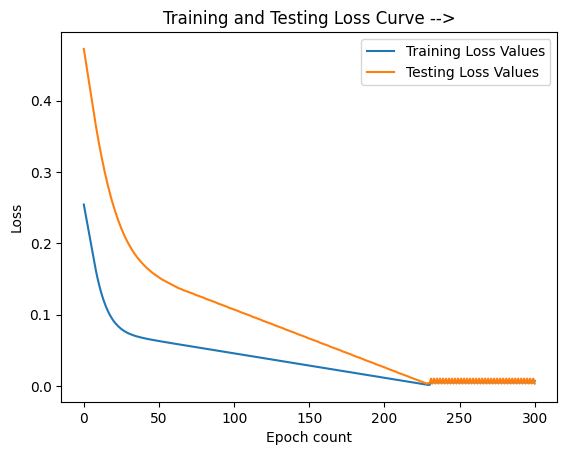

In [680]:
#Here the code failed normally, Saying  Can't call numpy() on Tensor that requires grad.
#Thus for turning off the grad we can do torch  inference mode
#Or as they are tensors with grad we can turn them into numpy arrays first too.


with torch.inference_mode():
    plt.plot(epoch_count,loss_values,label="Training Loss Values")
    plt.plot(epoch_count,test_loss_values,label="Testing Loss Values")
    plt.title("Training and Testing Loss Curve -->")
    plt.ylabel("Loss")
    plt.xlabel("Epoch count")
    plt.legend()

### Saving a Model in PyTorch -> 
Main 3 ways to save and load a model -> 
1. torch.save() -> Allows us to save a PyTorch object in Python's pickle format.
2. torch.load() -> Allows us to load a saved PyTorch object.
3. torch.nn.Module.load_state_dict() -> This allows to load a model's saved dictionary.

In [681]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7975])), ('bias', tensor([0.2056]))])

Two ways to save -> 
- Saving and Loading the state_dict()
- Saving and Loading the entire model.

In [682]:
#Saving the model -> 
from pathlib import Path

#Creating models directory -> 
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Creating model save path
MODEL_NAME = "PyTorch_Workflow_Model.pth"
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME

#Saving the state_dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)
print("Save successful!")

Save successful!


In [683]:
#Alternative method to save -> 

torch.save(model_0.state_dict(),"F:/AI/PyTorch/PyTorch Workflow/Models/PyTorch_Workflow_Model2.pth")
print("Save successful!")

Save successful!


##### Loading the PyTorch Model 

Since we have only saved model's `state_dict()` rather than the *entire model*, We will create a new instance of the model class, Then use the saved `state_dict()`

In [684]:
#To load a saved state_dict() we have to instantiate a new instance of our already created model class i.e. LinearRegressionModel first -> 

loaded_model_0= LinearRegressionModel()

In [685]:
#Checking state_dict() initially(Would have random numbers)
print(loaded_model_0.state_dict())

#Loading the saved state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print("Loading successful!")

#Checking state_dict() after loading
loaded_model_0.state_dict()

OrderedDict({'weights': tensor([0.2345]), 'bias': tensor([0.2303])})
Loading successful!


C:\Users\gaura\AppData\Local\Temp\ipykernel_26336\4090946309.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

OrderedDict([('weights', tensor([0.7975])), ('bias', tensor([0.2056]))])

In [686]:
#We know model has same parameters from up, Testing to show the outputs would be same too.
loaded_model_0.eval()
with torch.inference_mode():
    
    loaded_pred=loaded_model_0(X_test)

loaded_pred==y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Everything together -> 


### Data

In [687]:
#Importing everything  
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


#### We will write device agnostic code now -> 
- If GPU is available use it.

In [688]:
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [689]:
# Create weight and bias
weight = 0.5
bias = 0.5

# Create range values
start = 0
end = 2
step = 0.05

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X,y

(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000],
         [0.2500],
         [0.3000],
         [0.3500],
         [0.4000],
         [0.4500],
         [0.5000],
         [0.5500],
         [0.6000],
         [0.6500],
         [0.7000],
         [0.7500],
         [0.8000],
         [0.8500],
         [0.9000],
         [0.9500],
         [1.0000],
         [1.0500],
         [1.1000],
         [1.1500],
         [1.2000],
         [1.2500],
         [1.3000],
         [1.3500],
         [1.4000],
         [1.4500],
         [1.5000],
         [1.5500],
         [1.6000],
         [1.6500],
         [1.7000],
         [1.7500],
         [1.8000],
         [1.8500],
         [1.9000],
         [1.9500]]),
 tensor([[0.5000],
         [0.5250],
         [0.5500],
         [0.5750],
         [0.6000],
         [0.6250],
         [0.6500],
         [0.6750],
         [0.7000],
         [0.7250],
         [0.7500],
         [0.7750],
         [

In [690]:
#Splitting the data into Train and Test sets -> 
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)



In [691]:
#Visualising our data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     Predictions=None):
    plt.figure(figsize=(10,10))
    
    train_data = train_data.cpu() if hasattr(train_data, 'cpu') else train_data
    train_labels = train_labels.cpu() if hasattr(train_labels, 'cpu') else train_labels
    test_data = test_data.cpu() if hasattr(test_data, 'cpu') else test_data
    test_labels = test_labels.cpu() if hasattr(test_labels, 'cpu') else test_labels
    Predictions = Predictions.cpu() if hasattr(Predictions, 'cpu') else Predictions

    # Convert to numpy arrays
    train_data = train_data.numpy() if hasattr(train_data, 'numpy') else train_data
    train_labels = train_labels.numpy() if hasattr(train_labels, 'numpy') else train_labels
    test_data = test_data.numpy() if hasattr(test_data, 'numpy') else test_data
    test_labels = test_labels.numpy() if hasattr(test_labels, 'numpy') else test_labels
    Predictions = Predictions.numpy() if hasattr(Predictions, 'numpy') else Predictions
    plt.scatter(train_data,train_labels,c="r",s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
    
    if Predictions is not None:
        plt.scatter(test_data,Predictions,c="b",s=4,label="Prediction Data")
        
    plt.legend(prop={"size":10})

### Different way of defining model class using nn.Linear

In [692]:
# Subclass nn.Module to make our model
class LRModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
myModel = LRModel()
myModel, myModel.state_dict()

(LRModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [693]:
#Creating a seed for our testing -> 

torch.manual_seed(1)

myModel=LRModel()
myModel.to(device)
myModel.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.5153]], device='cuda:0')),
             ('linear_layer.bias', tensor([-0.4414], device='cuda:0'))])

In [694]:
loss_fn = nn.L1Loss()
optimizer=torch.optim.SGD(params=myModel.parameters(),lr=0.01)




In [695]:
epochs = 1000
epochList=[]
lossList=[]
test_lossList=[]

for epoch in range(epochs):
    
    myModel.train()

    # 1. Forward pass
    y_prediction = myModel(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_prediction, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    myModel.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = myModel(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
    

Epoch: 0 | Train loss: 0.9295492172241211 | Test loss: 0.8905298709869385
Epoch: 100 | Train loss: 0.13339972496032715 | Test loss: 0.26044443249702454
Epoch: 200 | Train loss: 0.04124192148447037 | Test loss: 0.07959742844104767
Epoch: 300 | Train loss: 0.011163411661982536 | Test loss: 0.00286237895488739
Epoch: 400 | Train loss: 0.011163411661982536 | Test loss: 0.00286237895488739
Epoch: 500 | Train loss: 0.011163411661982536 | Test loss: 0.00286237895488739
Epoch: 600 | Train loss: 0.011163411661982536 | Test loss: 0.00286237895488739
Epoch: 700 | Train loss: 0.011163411661982536 | Test loss: 0.00286237895488739
Epoch: 800 | Train loss: 0.011163411661982536 | Test loss: 0.00286237895488739
Epoch: 900 | Train loss: 0.011163411661982536 | Test loss: 0.00286237895488739


In [696]:
myModel.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5097]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5036], device='cuda:0'))])

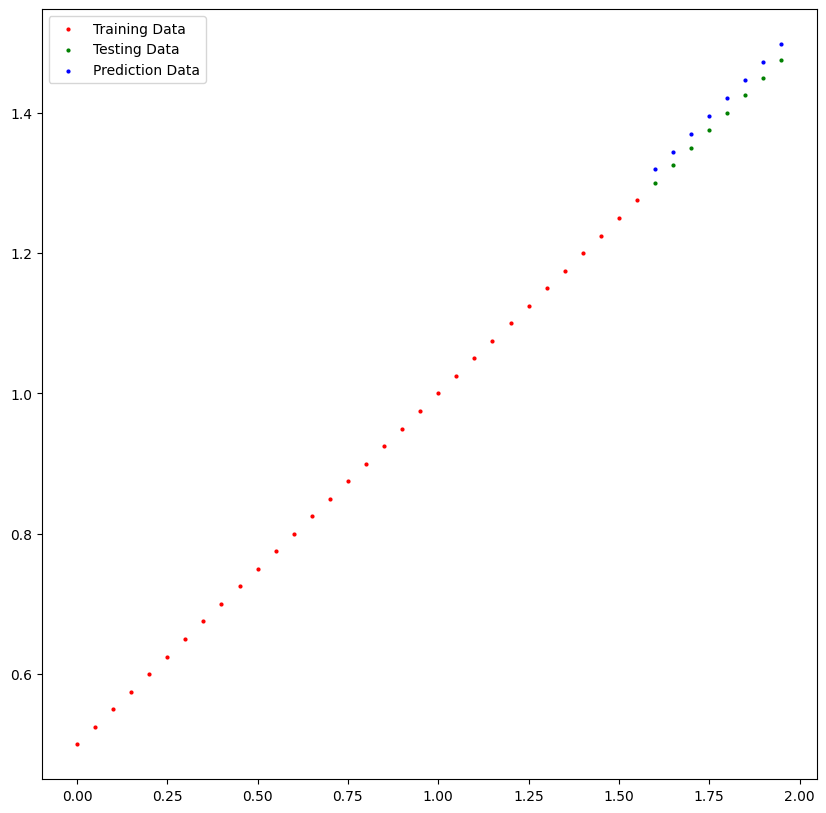

In [697]:
myModel.eval()
with torch.inference_mode():
    y_prediction_final=myModel(X_test)
    y_prediction_final_cpu = y_prediction_final.cpu()  # Move predictions to CPU for plotting

plot_predictions(Predictions=y_prediction_final_cpu)

In [698]:
#Saving the model -> 
torch.save(myModel.state_dict(),MODEL_PATH/"myModel.pth")
print("Saved successfully!")   

Saved successfully!


In [699]:
#Loading

loaded_myModel = LRModel()
loaded_myModel.load_state_dict(torch.load("Models/myModel.pth"))
print("Loaded successfully!")

Loaded successfully!


C:\Users\gaura\AppData\Local\Temp\ipykernel_26336\909521122.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_myModel.load_state_dict(torch.load("Models/myModel.pth

# End of PyTorch WorkFlow

Some other things tried/to try -> 
- Playing around with the Parameters and Hyperparameters -> 
    1. Loss functions
    2. Optimisers
    3. Learning Rate
    4. Input Size

- Things untouched ->  
    1. Activation functions
    2. Creating Chunks of Data
    3. Other Neural Network related stuff, Covered in the next part :) 